# Decision Tree Classifier Model for Predicting Rain Tomorrow

This notebook demonstrates building, tuning, and evaluating a Decision Tree classifier
to predict whether it will rain tomorrow based on weather data.


In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv")  # Load the CSV file into a DataFrame named 'data'
data.head()  # Display the first 5 rows of the dataset to preview the data


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
data.info()  # Displays summary information about the DataFrame: number of entries, column types, and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
data.isna().sum()  # Returns the total number of missing values in each column

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

## Handling missing values

In [5]:
numeric_cols = data.select_dtypes(include='number').columns  # Select numeric columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())  # Fill missing numeric values with the median

categorical_cols = data.select_dtypes(include='object').columns.drop('Date', errors='ignore')  # Select categorical columns excluding 'Date'
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])  # Fill missing categorical values with the mode (most frequent value)

if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])  # Convert 'Date' column to datetime format if it exists

print(data.isnull().sum())  # Print the number of missing values after imputation

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


## converting 'Date' column to datetime

In [6]:
# Convert 'Date' column to datetime format, handling errors (useful only if 'Date' is in Unix timestamp format)
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Extract time-based features from the 'Date' column
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['weekday'] = data['Date'].dt.weekday
data['hour'] = data['Date'].dt.hour
data['minute'] = data['Date'].dt.minute

# Drop the original 'Date' column after extracting features
data = data.drop(columns=['Date'])


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [8]:
# Apply Label Encoding to all categorical columns (object dtype)
for col in data.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    data[col] = label_encoder.fit_transform(data[col])

In [9]:
# Separate features (X) and target variable (Y)
X = data.drop('RainTomorrow', axis=1)
Y = data['RainTomorrow']

# Print shapes of features and target
print(f"x_shape: {X.shape}")
print(f"y_shape: {Y.shape}")

# Split data into training and testing sets with random state for reproducibility
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42)


x_shape: (145460, 27)
y_shape: (145460,)


- Preparing features and target, then splitting into train and test sets


# Build Decision Tree model


In [10]:
# Train a Decision Tree classifier
DT_clf = DecisionTreeClassifier(random_state=42)
DT_clf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = DT_clf.predict(x_test)

In [11]:
from sklearn.tree import DecisionTreeClassifier


In [12]:
# Y.value_counts()

In [13]:
# base_model = (1233 / len(Y)) * 100

# # Print the accuracy with two decimal places
# print(f"Accuracy Base Model = {base_model:.2f}%")

# Evaluating model performance: accuracy, confusion matrix, and classification report


In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [15]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print accuracy
print(f"Accuracy Score: {accuracy:.2f}\n")

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)
print("\n" + "="*60 + "\n")  # Separator

# Print classification report
print("Classification Report:")
print(class_report)

Accuracy Score: 0.79

Confusion Matrix:
[[24367  3960]
 [ 3830  4208]]


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     28327
           1       0.52      0.52      0.52      8038

    accuracy                           0.79     36365
   macro avg       0.69      0.69      0.69     36365
weighted avg       0.79      0.79      0.79     36365



In [16]:
y_pred_test=DT_clf.predict(x_train)
y_pred_test

array([1, 1, 0, ..., 0, 0, 0])

In [17]:
!pip install graphviz
!pip install pydot


# Visualizing the trained Decision Tree model


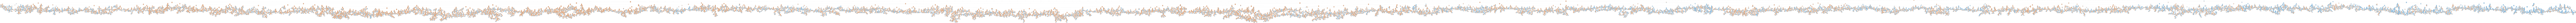

In [18]:
from IPython.display import Image, display
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

# Prepare feature names, excluding the target column
features = list(data.columns)
features.remove("RainTomorrow")

# Export the decision tree in DOT format
dot_data = StringIO()
export_graphviz(DT_clf, out_file=dot_data, feature_names=features, filled=True, rounded=True, special_characters=True)

# Create graph from DOT data
graph = pydot.graph_from_dot_data(dot_data.getvalue())

# Display the decision tree as a PNG image with specified size
display(Image(graph[0].create_png(), width=800, height=600))


# Hyperparameter tuning for Decision Tree using GridSearchCV with cross-validation


In [19]:
from sklearn.model_selection import GridSearchCV
params={
    'max_depth':[2,4,6,8]
    ,'min_samples_split':[2,5,10]
    ,'min_samples_leaf':[1,2,4]
    ,'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(DT_clf, param_grid=params, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(x_train, y_train)

best_pr=grid_search.best_params_
# Print the best parameters and the best accuracy score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Train Decision Tree model with tuned hyperparameters and make predictions


In [20]:
# Initialize Decision Tree with specific hyperparameters (e.g., from GridSearch results)
DT_clf = DecisionTreeClassifier(
    criterion='entropy',      # Use entropy as splitting criterion
    max_depth=2,              # Max depth of the tree set to 2
    min_samples_leaf=1,       # Minimum samples required at a leaf node
    min_samples_split=2,      # Minimum samples required to split a node
    random_state=42           # Random state for reproducibility
)

# Train the model on training data
DT_clf.fit(x_train, y_train)

# Predict target values for the test set
y_pred = DT_clf.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# Model evaluation: accuracy, confusion matrix, and classification report


In [21]:
# Calculate accuracy score of predictions
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix to see prediction distribution
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate detailed classification report (precision, recall, f1-score)
class_report = classification_report(y_test, y_pred)

# Print accuracy score formatted to 2 decimal places
print(f"Accuracy Score: {accuracy:.2f}\n")

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)
print("\n" + "="*60 + "\n")  # Separator for better readability

# Print classification report
print("Classification Report:")
print(class_report)


Accuracy Score: 0.82

Confusion Matrix:
[[27741   586]
 [ 5914  2124]]


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.90     28327
           1       0.78      0.26      0.40      8038

    accuracy                           0.82     36365
   macro avg       0.80      0.62      0.65     36365
weighted avg       0.82      0.82      0.78     36365



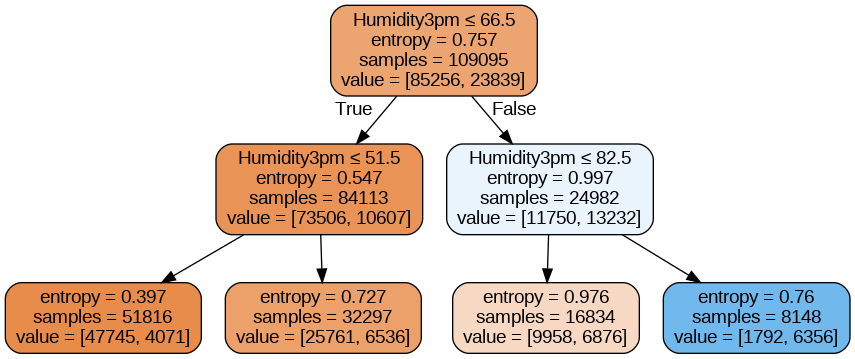

In [22]:
from IPython.display import Image, display
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

# Prepare feature names, excluding the target column
features = list(data.columns)
features.remove("RainTomorrow")

# Export the decision tree in DOT format
dot_data = StringIO()
export_graphviz(DT_clf, out_file=dot_data, feature_names=features, filled=True, rounded=True, special_characters=True)

# Create graph from DOT data
graph = pydot.graph_from_dot_data(dot_data.getvalue())

# Display the decision tree as a PNG image with specified size
display(Image(graph[0].create_png(), width=800, height=600))